## CART Based Decision Tree

In [132]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt

In [228]:
X,Y=make_gaussian_quantiles(mean=None, cov=1.0, n_samples=200, n_features=2, n_classes=2, shuffle=True, random_state=None)
data=np.append(X,Y.reshape(-1,1),axis=1)

In [222]:
X, Y = make_classification(n_samples=100,n_features=2, n_classes=2,n_redundant=0, n_informative=2, n_clusters_per_class=2,random_state=1,flip_y=0)
data=np.append(X,Y.reshape(-1,1),axis=1)

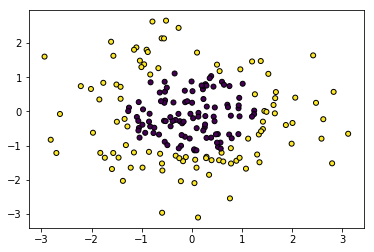

In [229]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')

In [8]:
def gini(data):
    
    data=data.reshape(-1,1)
    num_rows=len(data[:,0])

    num_ones_class=np.count_nonzero(data[:,0])
        
    num_zeroes_class=num_rows-num_ones_class
    
    gini=1-(num_ones_class/num_rows)**2-(num_zeroes_class/num_rows)**2
    
    return gini

In [9]:
def information_gain(data_subset,threshold):
    
    gini_complete_table=gini(data_subset[:,1])
    
    gini_greater=gini(data_subset[:,1][data_subset[:,0]>=threshold])
    
    gini_less=gini(data_subset[:,1][data_subset[:,0]<threshold])
    
    information_gain=gini_complete_table-(gini_greater+gini_less)
    
    return information_gain

In [111]:
def best_threshold(data_subset):
    
    sorted_subset=data_subset[data_subset[:,0].argsort()]
    
    possible_thresholds=[]
    
    for i in range(1,len(sorted_subset)):
        if sorted_subset[i,1]!=sorted_subset[i-1,1]:
            possible_thresholds.append([i,information_gain(sorted_subset,sorted_subset[i,0])])
    
    if possible_thresholds==[]:
        return sorted_subset[0,0],-np.inf
    
    best_threshold=sorted_subset[int(np.array(possible_thresholds)[np.array(possible_thresholds)[:,1].argsort()][-1,:][0]),0]
    
    infogain=np.array(possible_thresholds)[np.array(possible_thresholds)[:,1].argsort()][-1,:][1]
    
    return best_threshold, infogain

In [115]:
def best_feature(data):
    
    info_gain=[0,0]
    
    for i in (0,1):
        info_gain[i]=best_threshold(data[:,[i,2]])
        
    if info_gain[0][1]>=info_gain[1][1]:
        return [0,info_gain[0][0]]
    else:
        return [1,info_gain[1][0]]        

In [12]:
def create_leaf(data):
    leaf = {'splitting_feature' : None,
            'children' : None,
            'is_leaf':  True}
    
    ones=np.count_nonzero(data[:,2][data[:,2]==1])
    zeroes=len(data)-ones
    
    if ones>zeroes:
        leaf['Prediction']=1
    else:
        leaf['Prediction']=0
    
    return leaf

In [209]:
def tree(data,depth,max_depth):
       
    if(len(list(data))<=1):
        return create_leaf(data)
    
    if(len(data)<=1):
        return create_leaf(data)
    
    if(depth>=max_depth):
        return create_leaf(data) 
    
    BestSplittingFeature=best_feature(data)
    

    children={}
    
    children[0]=tree(data[data[:,BestSplittingFeature[0]]>=BestSplittingFeature[1]],depth+1,max_depth)
    children[1]=tree(data[data[:,BestSplittingFeature[0]]<BestSplittingFeature[1]],depth+1,max_depth)
      
    return {'splitting_feature' : BestSplittingFeature,
            'children': children,
            'is_leaf':  False}

In [14]:
def getNumLeafs(node):
    if(node['is_leaf']==True):
        return 1
    count=0
    for child in node['children'].keys():
        count+=getNumLeafs(node['children'][child])
    
    return count

def getTreeDepth(node):
    if(node['is_leaf']==True):
        return 1
    
    maxDepth=0
    for child in node['children'].keys():
        depth=1+getTreeDepth(node['children'][child])
        if depth>maxDepth:
            maxDepth=depth
    return maxDepth

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,
    xycoords='axes fraction',
    xytext=centerPt, textcoords='axes fraction',
    va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    getTreeDepth(myTree)
    firstStr = myTree['splitting_feature']
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree['children']
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if secondDict[key]['is_leaf']==False:
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key]['Prediction'], (plotTree.xOff, plotTree.yOff),cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

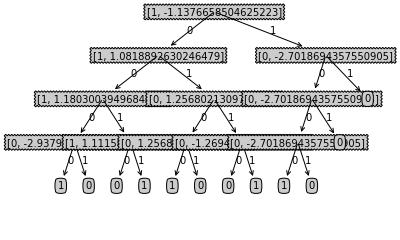

In [247]:
createPlot(tree(data,0,4))

In [215]:
def classify(tree, data):
    if(tree['is_leaf']==True):
        return tree['Prediction']
    
    if data[tree['splitting_feature'][0]]>=tree['splitting_feature'][1]:
        prediction=classify(tree['children'][0],data)
    else:
        prediction=classify(tree['children'][1],data)
    
    return prediction

In [248]:
tree_model=tree(data,0,4)

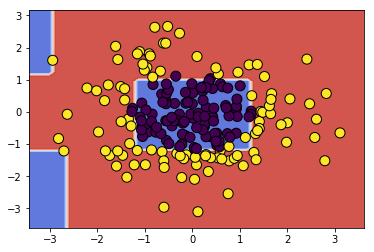

In [249]:
xx = np.linspace(min(data[:,0])-0.5, max(data[:,0])+0.5, 50)
yy = np.linspace(min(data[:,1])-0.5, max(data[:,1])+0.5, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
pred=[0]*len(xy)
pred=np.array(pred)
for i in range(0,len(xy)):
    if classify(tree_model,xy[i,:])==0:
        pred[i]=0
    else:
        pred[i]=1
        
Z=pred.reshape(XX.shape)
plt.contourf(XX, YY, Z,cmap=plt.cm.coolwarm,alpha=0.9)
plt.scatter(data[:,0], data[:,1],c=data[:,2],s=100,edgecolors='black')